In [1]:
import os
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

In [2]:
#Setting names of the directories for both sets.
base_dir = 'dataset'
seta = 'George_W_Bush'
setb = 'Colin_Powell'

#Each of the sets has three sub directories train, validation and test
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

def prepare_data(base_dir, seta, setb):
# Takes the directory names for the base directory, and both the sets
# Returns the paths for train, validation for each of the sets.
	seta_train_dir = os.path.join(train_dir, seta)
	setb_train_dir = os.path.join(train_dir, setb)
	
	seta_valid_dir = os.path.join(validation_dir, seta)
	setb_valid_dir = os.path.join(validation_dir, setb)
	
	seta_train_fnames = os.listdir(seta_train_dir)
	setb_train_fnames = os.listdir(setb_train_dir)
	
	return seta_train_dir, setb_train_dir, seta_valid_dir, setb_valid_dir, seta_train_fnames, setb_train_fnames
	
seta_train_dir, setb_train_dir, seta_valid_dir, setb_valid_dir, seta_train_fnames, setb_train_fnames = prepare_data(base_dir, seta, setb)

seta_test_dir = os.path.join(test_dir, seta)
setb_test_dir = os.path.join(test_dir, setb)
test_fnames_seta = os.listdir(seta_test_dir)
test_fnames_setb = os.listdir(setb_test_dir)

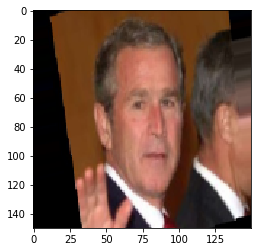

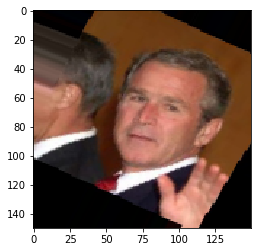

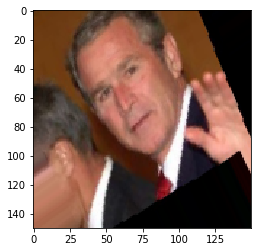

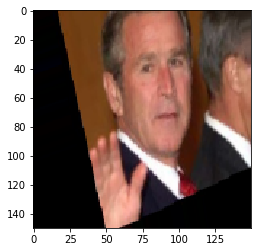

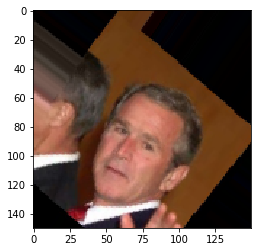

In [3]:
datagen = ImageDataGenerator(
	rotation_range = 40,
	width_shift_range = 0.2,
	height_shift_range = 0.2,
	shear_range = 0.2,
	zoom_range = 0.2,
	horizontal_flip = True,
	fill_mode = 'nearest')

img_path = os.path.join(seta_train_dir, seta_train_fnames[4])
img = load_img(img_path, target_size=(150, 150))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size = 1):
	plt.figure(i)
	imgplot = plt.imshow(array_to_img(batch[0]))
	i += 1
	if i % 5 == 0:
		break

In [4]:
# Import Tensorflow Libraries
from tensorflow.keras import layers
from tensorflow.keras import Model
import matplotlib.pyplot as plt

img_input = layers.Input(shape=(150, 150, 3))

# 2D Convolution Layer with 64 filters of dimension 3x3 and ReLU  activation algorithm
x = layers.Conv2D(64, 3, activation='relu')(img_input)
# 2D Max Pooling Layer
x = layers.MaxPooling2D(2)(x)

# 2D Convolution Layer with 128 filters of dimension 3x3 and ReLU  activation algorithm
x = layers.Conv2D(128, 3, activation='relu')(x)
# 2D Max Pooling Layer
x = layers.MaxPooling2D(2)(x)

# 2D Convolution Layer with 256 filters of dimension 3x3 and ReLU  activation algorithm
x = layers.Conv2D(256, 3, activation='relu')(x)
# 2D Max Pooling Layer
x = layers.MaxPooling2D(2)(x)

# 2D Convolution Layer with 512 filters of dimension 3x3 and ReLU  activation algorithm
x = layers.Conv2D(512, 3, activation='relu')(x)
# 2D Max Pooling Layer
x = layers.MaxPooling2D(2)(x)

# 2D Convolution Layer with 512 filters of dimension 3x3 and ReLU  activation algorithm
x = layers.Conv2D(512, 3, activation='relu')(x)
# 2D Max Pooling Layer
x = layers.Flatten()(x)

# Fully Connected Layers and ReLU activation algorithm
x = layers.Dense(4096, activation='relu')(x)
x = layers.Dense(4096, activation='relu')(x)
x = layers.Dense(1000, activation='relu')(x)

# Dropout Layer for optimization
x = layers.Dropout(0.5)(x)

# Fully Connected Layers and sigmoid activation algorithm
output = layers.Dense(1, activation='sigmoid')(x)

model = Model(img_input, output)

# 96
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 256)       0     

In [5]:
import tensorflow as tf
# Using binnary_cossentropy as the loss function
# and Adam Optimizer as the optimizing function when training
model.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005),
              metrics = ['acc'])

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen =ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir, # Training directory
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary')

validation_generator = val_datagen.flow_from_directory(
	validation_dir, #Validationdirectory
	target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary')

Found 530 images belonging to 2 classes.
Found 206 images belonging to 2 classes.


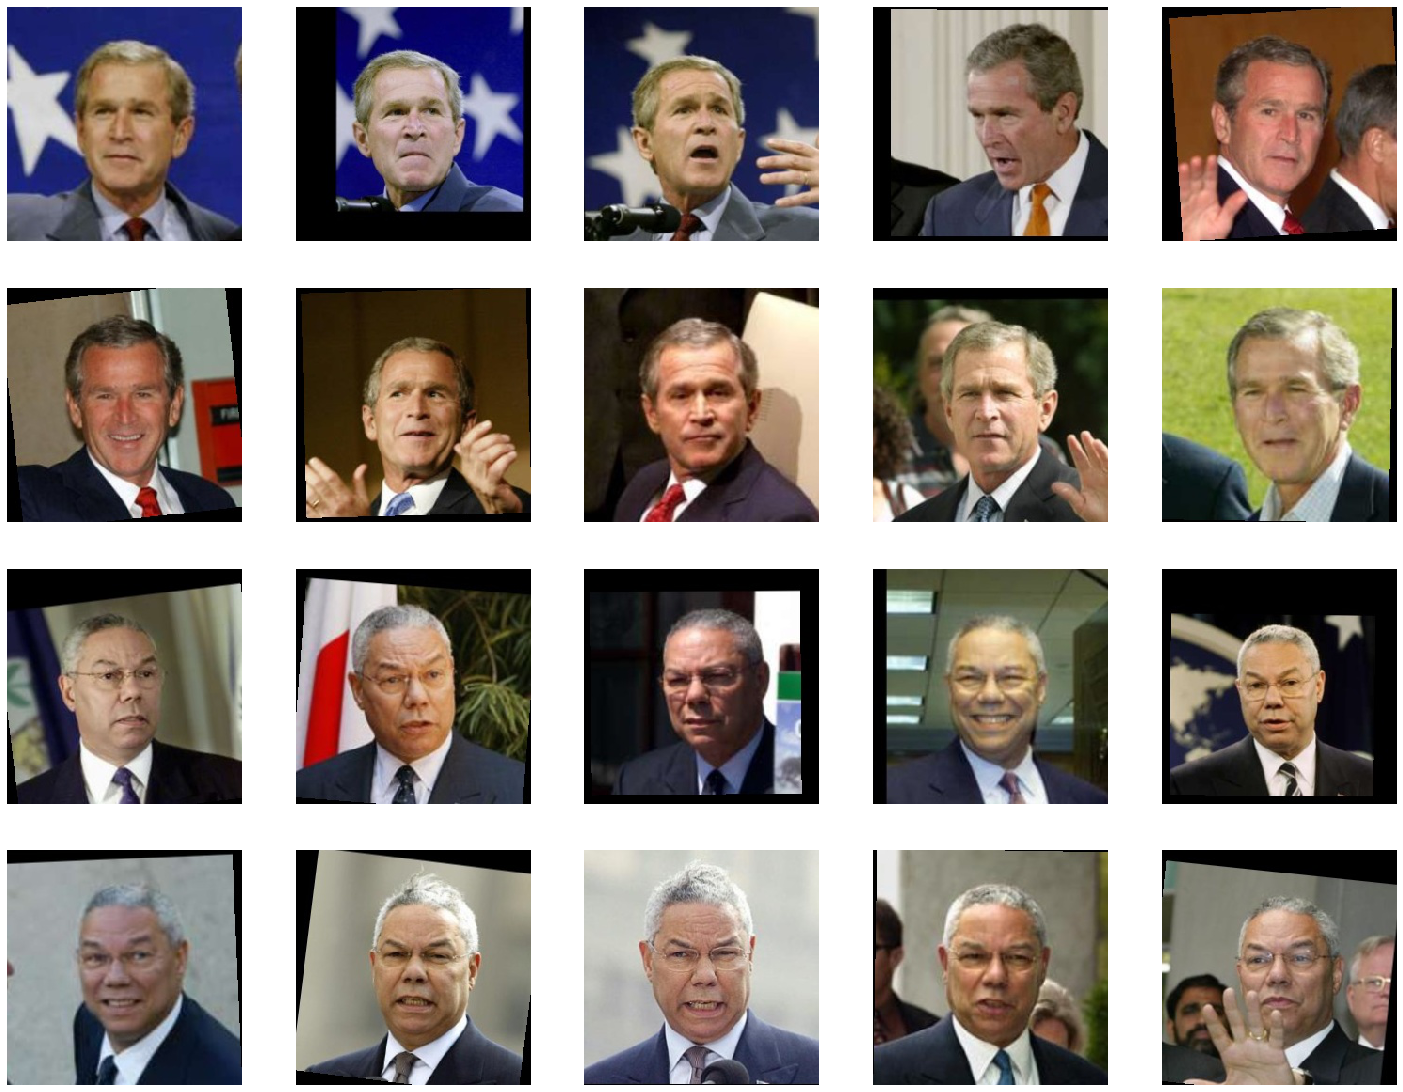

In [7]:
import matplotlib.image as mping

# 4x4 grid
nrows = 5
ncols = 5

pic_index = 0

# Set up matplotlib fig, and size it to fit 5x5 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 5, nrows * 5)

pic_index += 10
next_seta_pix = [os.path.join(seta_train_dir, fname)
                 for fname in seta_train_fnames[pic_index-10:pic_index]]
next_setb_pix = [os.path.join(setb_train_dir, fname)
                 for fname in setb_train_fnames[pic_index-10:pic_index]]

for i, img_path in enumerate(next_seta_pix + next_setb_pix):
	# Set up subplot; subplot indices start at 1
	sp = plt.subplot(nrows, ncols, i + 1)
	sp.axis('off') # Don't show axes (or gridlines)
	
	img = mpimg.imread(img_path)
	plt.imshow(img)

plt.show()

In [8]:
#train the model
mymodel = model.fit_generator(
	train_generator,
	steps_per_epoch = 10,
	epochs = 80,
	validation_data = validation_generator,
	validation_steps = 7,
	verbose = 2)

Epoch 1/80
10/10 - 34s - loss: 0.6752 - acc: 0.6950 - val_loss: 0.6747 - val_acc: 0.6000
Epoch 2/80
10/10 - 31s - loss: 0.6650 - acc: 0.7500 - val_loss: 0.6745 - val_acc: 0.6000
Epoch 3/80
10/10 - 31s - loss: 0.5835 - acc: 0.7632 - val_loss: 0.6853 - val_acc: 0.6000
Epoch 4/80
10/10 - 32s - loss: 0.6175 - acc: 0.7300 - val_loss: 0.6820 - val_acc: 0.6000
Epoch 5/80
10/10 - 31s - loss: 0.5661 - acc: 0.7684 - val_loss: 0.7125 - val_acc: 0.6000
Epoch 6/80
10/10 - 32s - loss: 0.5666 - acc: 0.7600 - val_loss: 0.6920 - val_acc: 0.6000
Epoch 7/80
10/10 - 35s - loss: 0.5519 - acc: 0.7750 - val_loss: 0.7849 - val_acc: 0.6000
Epoch 8/80
10/10 - 31s - loss: 0.5848 - acc: 0.7500 - val_loss: 0.7412 - val_acc: 0.6000
Epoch 9/80
10/10 - 30s - loss: 0.5770 - acc: 0.7667 - val_loss: 0.6731 - val_acc: 0.6000
Epoch 10/80
10/10 - 33s - loss: 0.5876 - acc: 0.7500 - val_loss: 0.7245 - val_acc: 0.6000
Epoch 11/80
10/10 - 35s - loss: 0.5370 - acc: 0.7700 - val_loss: 0.7491 - val_acc: 0.6000
Epoch 12/80
10/10 -

C:\Users\emili\miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


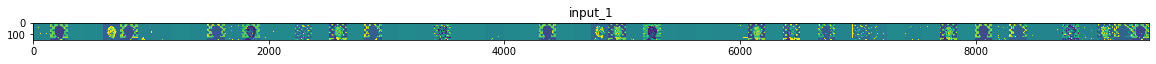

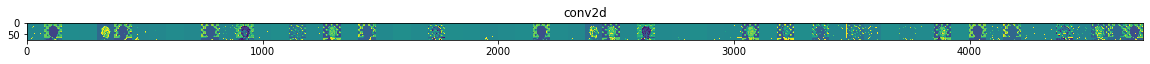

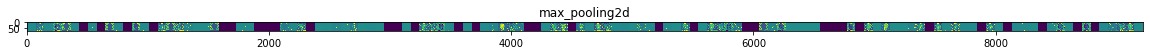

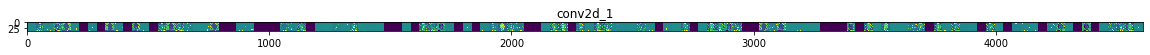

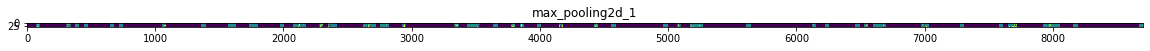

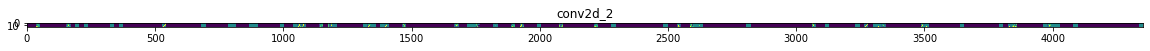

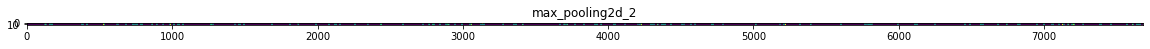

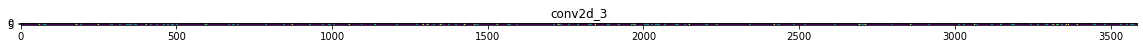

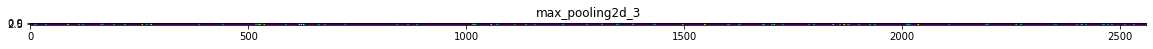

In [9]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

successive_outputs = [layers.output for layers in model.layers[1:]]
visualization_model = Model(img_input, successive_outputs)

a_img_files = [os.path.join(seta_train_dir, f) for f in seta_train_fnames]
b_img_files = [os.path.join(setb_train_dir, f) for f in setb_train_fnames]
img_path = random.choice(a_img_files + b_img_files)

img = load_img(img_path, target_size = (150, 150))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

x /= 255

successive_feature_maps = visualization_model.predict(x)

layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
	if len(feature_map.shape) == 4:
		# Just do this for the conv / maxpool layers, not the fully-connected layers
		n_features = feature_map.shape[-1] # number of features in feature map
		# The feature map has shape (1, size, size, n_features)
		size = feature_map.shape[1]
		# We will tile our images in this matrix
		display_grid = np.zeros((size, size * n_features))
		for i in range(n_features):
			# Postprocess the feature to make it bisually platable
			x = feature_map[0, :, :, i]
			x -= x.mean()
			x /= x.std()
			x *= 64
			x += 128
			x = np.clip(x, 0, 255).astype('uint8')
			# We'll tile each filter into this big horizontal grid
			display_grid[:, i * size : (i + 1) * size] = x
		# Display the grid
		scale = 20. / n_features
		plt.figure(figsize = (scale * n_features, scale))
		plt.title(layer_name)
		plt.grid(False)
		plt.imshow(display_grid, aspect = 'auto', cmap = 'viridis')

Text(0.5, 1.0, 'Training and validation loss')

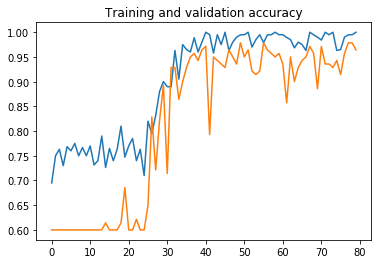

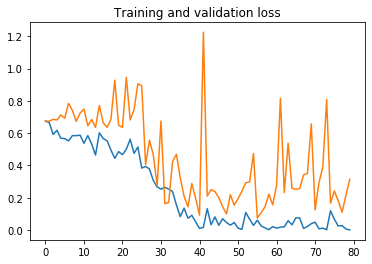

In [10]:
# Accurracy results for each training and validation epoch
acc = mymodel.history['acc']
val_acc = mymodel.history['val_acc']

# Loss Results for each training and validation epoch
loss = mymodel.history['loss']
val_loss = mymodel.history['val_loss']

epochs = range(len(acc))

# Plot accuracy for each training and validation epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot loss for each training and validation epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

(1, 150, 150, 3)


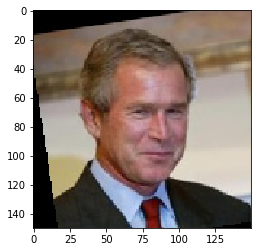

In [11]:
train_img = random.choice(seta_train_fnames)
train_image_path = os.path.join(seta_train_dir, train_img)
train_img = load_img(train_image_path, target_size = (150, 150))
plt.imshow(train_img)
train_img = (np.expand_dims(train_img, 0))
print(train_img.shape)

In [12]:
train_img = tf.cast(train_img, tf.float32)
model.predict(train_img)

array([[1.]], dtype=float32)

(1, 150, 150, 3)


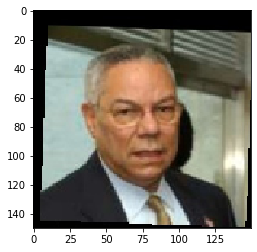

In [13]:
train_img = random.choice(setb_train_fnames)
train_image_path = os.path.join(setb_train_dir, train_img)
train_img = load_img(train_image_path, target_size = (150, 150))
plt.imshow(train_img)
train_img = (np.expand_dims(train_img, 0))
print(train_img.shape)

In [14]:
train_img = tf.cast(train_img, tf.float32)
model.predict(train_img)

array([[0.]], dtype=float32)

In [28]:
cal_cp = 0
cal_gwb = 0
cal_unconclusive = 0
alist = []
for fname in test_fnames_seta:
	if fname.startswith('.'):
		continue
	file_path = os.path.join(seta_test_dir, fname)
	load_file = load_img(file_path, target_size = (150,150))
	load_file = (np.expand_dims(load_file, 0))
	load_file = tf.cast(load_file, tf.float32)
	pred_img = model.predict(load_file)
	if(pred_img[0] < 0.5):
		cal_cp += 1
	elif(pred_img[0] > 0.5):
		cal_gwb += 1
	else:
		print(pred_img[0], "\n")
		cal_unconclusive += 1
		alist.append(file_path)
print(alist)

print("Identified as: \n")
print("Colin Powell :", cal_cp)
print("George W Bush:", cal_gwb)
print("Inconclusive :", cal_unconclusive)

a = (cal_gwb/(cal_gwb + cal_unconclusive + cal_cp)) * 100
print("Percentage :",a)

[]
Identified as: 

Colin Powell : 0
George W Bush: 15
Inconclusive : 0
Percentage : 100.0


In [29]:
cal_cp = 0
cal_gwb = 0
cal_unconclusive = 0
blist = []
for fname in test_fnames_setb:
	if fname.startswith('.'):
		continue
	file_path = os.path.join(setb_test_dir, fname)
	load_file = load_img(file_path, target_size = (150,150))
	load_file = (np.expand_dims(load_file, 0))
	load_file = tf.cast(load_file, tf.float32)
	pred_img = model.predict(load_file)
	if(pred_img[0] < 0.5):
		cal_cp += 1
	elif(pred_img[0] > 0.5):
		cal_gwb += 1
	else:
		print(pred_img[0], "\n")
		cal_unconclusive += 1
		blist.append(file_path)
print(blist)

print("Identified as: \n")
print("Colin Powell :", cal_cp)
print("George W Bush:", cal_gwb)
print("Inconclusive :", cal_unconclusive)

b = (cal_cp/(cal_gwb + cal_unconclusive + cal_cp)) * 100
print("Percentage :",b)

[]
Identified as: 

Colin Powell : 15
George W Bush: 0
Inconclusive : 0
Percentage : 100.0


In [23]:
avg = (a + b)/2
print("Average Percentage :", avg)

Average Percentage : 100.0


(1, 150, 150, 3)


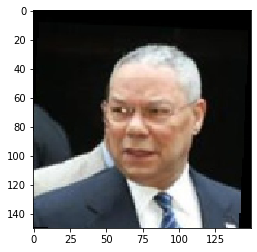

In [30]:
rand_test_img = random.choice(test_fnames_setb)
rand_test_image_path = os.path.join(setb_test_dir, rand_test_img)
rand_test_img = load_img(rand_test_image_path, target_size = (150, 150))
plt.imshow(rand_test_img)
rand_test_img = (np.expand_dims(rand_test_img, 0))
print(rand_test_img.shape)

In [31]:
print("Idetified as:\n")
if(model.predict(train_img) < 0.5):
	print("Collin Powell")
elif(model.predict(train_img) > 0.5):
	print("George W Bush")
else:
	print("Inconclusive")

Idetified as:

Collin Powell
